## 1. Loading Data


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline


In [2]:
df_demo= pd.read_csv('../data/cleaned/final_demo_cleaned.csv')
df_web = pd.read_csv('../data/cleaned/Concat_Web_Data_cleaned.csv')
df_exp = pd.read_csv('../data/cleaned/experiment_clients_clean.csv')

df_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6,73,60,Unknown,2,45105.30,6,9
1,2304905,7,94,58,Unknown,2,110860.30,6,9
2,1439522,5,64,32,Unknown,2,52467.79,6,9
3,1562045,16,198,49,Male,2,67454.65,3,6
4,5126305,12,145,33,Female,2,103671.75,0,3
...,...,...,...,...,...,...,...,...,...
70604,7993686,4,56,38,Unknown,3,1411062.68,5,5
70605,8981690,12,148,31,Male,2,101867.07,6,6
70606,333913,16,198,61,Female,2,40745.00,3,3
70607,1573142,21,255,68,Male,3,475114.69,4,4


In [3]:
df_web

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [4]:
df_exp

,client_id,variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
50495,393005,Control
50496,2908510,Control
50497,7230446,Test
50498,5230357,Test


## 2. EDA

### Client behavior analysis

#### Who are the primary clients using this online process?

**Assumptions** : 
- We only consider the variation Test - Control as it indicates that a client was part of the experiment after than UI changes and provides insights into how the changes affect client behavior.
- Moving forward we determined if there are commonalities among the clients who enganged in the process. 
- We conduct AB testing Test vs Control to better analyze the customer experience fully



**Restrict to Experiment Participants**

Only clients in the experiment should be analyzed.

In [5]:
df_web_exp = df_web.merge(df_exp[['client_id', 'variation']],
    on='client_id',
    how='inner'
)

df_web_exp

,client_id,visitor_id,visit_id,process_step,date_time,variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test
...,...,...,...,...,...,...
321304,1574008,117364417_77840596075,528720790_71583064618_169151,start,2017-05-06 23:43:27,Test
321305,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control
321306,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control
321307,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control


In [6]:
df_web_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321309 entries, 0 to 321308
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     321309 non-null  int64 
 1   visitor_id    321309 non-null  object
 2   visit_id      321309 non-null  object
 3   process_step  321309 non-null  object
 4   date_time     321309 non-null  object
 5   variation     321309 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.7+ MB


In [7]:
df_total = df_web_exp.merge(
    df_demo[['client_id','clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth']],
    on="client_id",
    how="inner"
)

df_total

,client_id,visitor_id,visit_id,process_step,date_time,variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,5,64,79,Unknown,2,189023.86,1,4
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test,5,64,79,Unknown,2,189023.86,1,4
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test,5,64,79,Unknown,2,189023.86,1,4
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test,5,64,79,Unknown,2,189023.86,1,4
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test,5,64,79,Unknown,2,189023.86,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321304,1574008,117364417_77840596075,528720790_71583064618_169151,start,2017-05-06 23:43:27,Test,10,121,55,Unknown,2,153238.83,3,6
321305,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control,21,252,34,Male,3,141808.05,6,9
321306,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control,21,252,34,Male,3,141808.05,6,9
321307,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control,21,252,34,Male,3,141808.05,6,9


In [8]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321309 entries, 0 to 321308
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   client_id         321309 non-null  int64  
 1   visitor_id        321309 non-null  object 
 2   visit_id          321309 non-null  object 
 3   process_step      321309 non-null  object 
 4   date_time         321309 non-null  object 
 5   variation         321309 non-null  object 
 6   clnt_tenure_yr    321309 non-null  int64  
 7   clnt_tenure_mnth  321309 non-null  int64  
 8   clnt_age          321309 non-null  int64  
 9   gendr             321309 non-null  object 
 10  num_accts         321309 non-null  int64  
 11  bal               321207 non-null  float64
 12  calls_6_mnth      321309 non-null  int64  
 13  logons_6_mnth     321309 non-null  int64  
dtypes: float64(1), int64(7), object(6)
memory usage: 34.3+ MB


#### Demographic profile of primary users

1. Age

In [9]:
df_total['clnt_age'].describe()

count    321309.000000
mean         48.247852
std          15.684498
min           0.000000
25%          34.000000
50%          50.000000
75%          61.000000
max          96.000000
Name: clnt_age, dtype: float64

2. Gender

In [10]:
df_total['gendr'].value_counts()
df_total['gendr'].value_counts(normalize=True)

gendr
Unknown       0.339194
Male          0.336165
Female        0.324616
Non-binary    0.000025
Name: proportion, dtype: float64

#### Financial profile

1. Balance

In [11]:
df_total['bal'].describe()

count    3.212070e+05
mean     1.622097e+05
std      3.494719e+05
min      2.378944e+04
25%      4.105887e+04
50%      6.924049e+04
75%      1.514930e+05
max      1.632004e+07
Name: bal, dtype: float64

2. Nº of accounts

In [12]:
df_total['num_accts'].value_counts().sort_index()

num_accts
0       102
1         5
2    250560
3     58651
4     10413
5      1373
6       154
7        51
Name: count, dtype: int64

#### Client tenure

In [13]:
df_total[['clnt_tenure_yr', 'clnt_tenure_mnth']].describe()

,clnt_tenure_yr,clnt_tenure_mnth
count,321309.000000,321309.000000
mean,12.172507,152.084800
std,6.965370,83.240308
min,0.000000,0.000000
25%,6.000000,82.000000
50%,11.000000,137.000000
75%,16.000000,193.000000
max,55.000000,669.000000


**Test vs Control comparision**

In [14]:
df_total.groupby('variation').agg(
    avg_age=('clnt_age', 'mean'),
    median_age=('clnt_age', 'median'),
    avg_balance=('bal', 'mean'),
    median_balance=('bal', 'median'),
    avg_accounts=('num_accts', 'mean'),
    avg_tenure_yrs=('clnt_tenure_yr', 'mean'),
    client_count=('client_id', 'count')
)

,avg_age,median_age,avg_balance,median_balance,avg_accounts,avg_tenure_yrs,client_count
variation,,,,,,,
Control,48.019211,49.0,159398.638999,69009.64,2.273334,12.168240,143462
Test,48.432287,50.0,164477.426879,69380.44,2.253280,12.175949,177847


### Are the primary clients younger or older?

In [15]:
df_total['age_category'] = np.select(
    [
        df_total['clnt_age'] <= 19,
        df_total['clnt_age'].between(20, 39),
        df_total['clnt_age'].between(40, 64),
        df_total['clnt_age'] >= 65
    ],
    ['Young', 'Adult', 'Middle Adult', 'Old'],
    default='Unknown')

df_total

,client_id,visitor_id,visit_id,process_step,date_time,variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,age_category
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,5,64,79,Unknown,2,189023.86,1,4,Old
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test,5,64,79,Unknown,2,189023.86,1,4,Old
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test,5,64,79,Unknown,2,189023.86,1,4,Old
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test,5,64,79,Unknown,2,189023.86,1,4,Old
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test,5,64,79,Unknown,2,189023.86,1,4,Old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321304,1574008,117364417_77840596075,528720790_71583064618_169151,start,2017-05-06 23:43:27,Test,10,121,55,Unknown,2,153238.83,3,6,Middle Adult
321305,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control,21,252,34,Male,3,141808.05,6,9,Adult
321306,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control,21,252,34,Male,3,141808.05,6,9,Adult
321307,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control,21,252,34,Male,3,141808.05,6,9,Adult


In [16]:
df_total['clnt_age'].describe()

count    321309.000000
mean         48.247852
std          15.684498
min           0.000000
25%          34.000000
50%          50.000000
75%          61.000000
max          96.000000
Name: clnt_age, dtype: float64

In [17]:
df_total['age_category'].value_counts(normalize=True) * 100

age_category
Middle Adult    50.509634
Adult           32.171523
Old             16.386718
Young            0.932125
Name: proportion, dtype: float64

The primary clients are between 40 years old and 64.  

**Visualization: Age Distribution of Online Process Users by Gender**

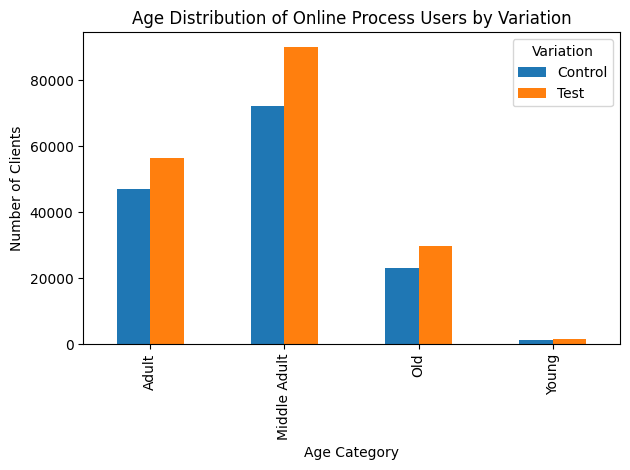

In [18]:
age_variation_counts = (
    df_total
    .groupby(['age_category', 'variation'])
    .size()
    .unstack(fill_value=0)
    .sort_index()
)

age_variation_counts.plot(kind='bar')

plt.title('Age Distribution of Online Process Users by Variation')
plt.xlabel('Age Category')
plt.ylabel('Number of Clients')
plt.legend(title='Variation')
plt.tight_layout()
plt.show()

### Are the primary clients new or long-standing?

In [19]:
bins = [-1, 3, 9, 19, df_total['clnt_tenure_yr'].max()]
labels = ["New (0–3)", 
          "Emerging (4–9)", 
          "Established (10–19)", 
          "Long-standing (20+)"
]

df_total["tenure_group"] = pd.cut(df_total['clnt_tenure_yr'], bins=bins, labels=labels)

tenure_summary = (df_total["tenure_group"].value_counts().sort_index().to_frame("count"))

tenure_summary["percentage"] = (
    tenure_summary["count"] / tenure_summary["count"].sum() * 100
).round(2)

tenure_summary

,count,percentage
tenure_group,,
New (0–3),2726,0.85
Emerging (4–9),139884,43.54
Established (10–19),124569,38.77
Long-standing (20+),54130,16.85


**Visualization: Client Distribution by Tenure Group**

/var/folders/lr/d46q9z0s2zndy_5npx2_zwq00000gn/T/ipykernel_51995/3341097469.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['tenure_group', 'variation'])


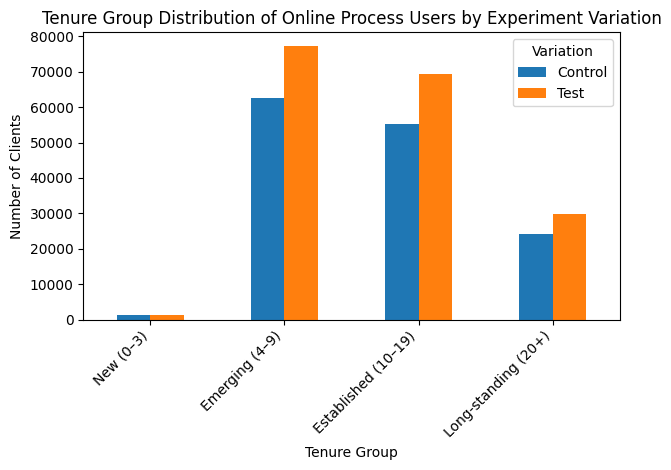

In [20]:
tenure_variation_summary = (
    df_total
    .groupby(['tenure_group', 'variation'])
    .size()
    .unstack(fill_value=0)
)

tenure_variation_summary.plot(kind='bar')

plt.title('Tenure Group Distribution of Online Process Users by Experiment Variation')
plt.xlabel('Tenure Group')
plt.ylabel('Number of Clients')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Variation')
plt.tight_layout()
plt.show()

## 3. Performance Metrics
### 3.1 Sucess Indicators

**Completion Rate**

In [21]:
df_total['process_step'].unique()

array(['step_3', 'step_2', 'step_1', 'start', 'confirm'], dtype=object)

In [22]:
completed_users = df_total.loc[
    df_total["process_step"] == "confirm",
    "client_id"
].nunique()

total_users = df_total.loc[
    df_total["process_step"] == "start",
    "client_id"
].nunique()

completion_rate = completed_users / total_users

print(f"Completion Rate: {completion_rate:.2%}")

Completion Rate: 68.14%


In [23]:
#Only clients who actually started are counted

client_funnel = (
    df_total
    .groupby('client_id')
    .agg(
        started=('process_step', lambda x: 'start' in set(x)),
        completed=('process_step', lambda x: 'confirm' in set(x))
    )
)

client_funnel = client_funnel[client_funnel['started']]

completion_rate = client_funnel['completed'].mean()

print(f"Completion Rate: {completion_rate:.2%}")

Completion Rate: 67.36%


In [24]:
completion_by_group = (
    df_total[df_total["process_step"] == "confirm"]
    .groupby("variation")["client_id"]
    .nunique()
    / df_total.groupby("variation")["client_id"].nunique()
)

completion_by_group

variation
Control    0.655873
Test       0.692932
Name: client_id, dtype: float64

**Error Rate**

In [25]:
step_order = [
    "start",
    "personal_info",
    "financial_info",
    "review",
    "confirm"
]

step_to_index = {step: idx for idx, step in enumerate(step_order)}

df_total = df_total[df_total["process_step"].isin(step_order)].copy()

df_total["step_index"] = df_total["process_step"].map(step_to_index)

df_total["prev_step_index"] = df_total.groupby(
    ["client_id", "visit_id"]
)["step_index"].shift(1)

df_total["is_error"] = df_total["step_index"] < df_total["prev_step_index"]

error_rate = (
    df_total.groupby(["client_id", "visit_id"])["is_error"]
       .any()
       .mean()
)

print(f"Overall Error Rate: {error_rate:.2%}")

Overall Error Rate: 46.33%


In [26]:
session_errors = (
    df_total
    .groupby(["client_id", "visit_id", "variation"])["is_error"]
    .any()
    .reset_index(name="session_error")
)

error_rate_by_variation = (
    session_errors
    .groupby("variation")["session_error"]
    .mean()
)

print(error_rate_by_variation)

variation
Control    0.451694
Test       0.473373
Name: session_error, dtype: float64


**Repeated step:** boolean indicator that signals if the client repeated any step in the process. May be a sign of confusion or usability problems in the flow.

In [27]:
# Group by client_id and visit_id to count repeated steps per visit
repeat_steps = df_total.groupby(['client_id', 'visit_id'])['process_step'].value_counts()

# Create a dataframe with the count of repeated steps and add a column on whether or not there are repeated steps (appears more than once).
repeat_steps = repeat_steps.reset_index(name='count')
repeat_steps['repeated_step'] = repeat_steps['count'] > 1

In [28]:
# Group this information first by visit_id to see if you have repeated any steps in that visit.
repeat_steps_visit = repeat_steps.groupby(['client_id', 'visit_id'])['repeated_step'].any().reset_index()

# Finally group by client_id, to see if the clients have repeated steps in any of their visits.
repeat_steps_client = repeat_steps_visit.groupby('client_id')['repeated_step'].any().reset_index()

In [29]:
# df_web = df_web.merge(repeat_steps_client, on='client_id', how='left')

**Drop-Off Rate**

In [30]:
drop_off_rate = 1 - completion_rate

print(f"Drop-off Rate: {drop_off_rate:.2%}")

Drop-off Rate: 32.64%


**Time To Completition**

In [31]:
df_total['date_time'] = pd.to_datetime(df_total['date_time'])

time_to_completion = (
    df_total[df_total["process_step"].isin(["start", "confirm"])]
    .groupby("client_id")
    .agg(
        start_time=("date_time", lambda x: x[df_total.loc[x.index, "process_step"] == "start"].min()),
        confirm_time=("date_time", lambda x: x[df_total.loc[x.index, "process_step"] == "confirm"].max())
    )
    .dropna()
)

time_to_completion["duration"] = (
    (time_to_completion["confirm_time"] - time_to_completion["start_time"])
    .dt.total_seconds() / 60
)

In [32]:
print(time_to_completion['duration'].describe())

count     33730.000000
mean       6218.940150
std       18595.498459
min      -38993.333333
25%           3.100000
50%           5.666667
75%          20.066667
max      139565.816667
Name: duration, dtype: float64


## Time to completition IS NOT LOGICALLY CORRECT, because it's negative!! 

In [33]:
session_times = (
    df_total[df_total["process_step"].isin(["start", "confirm"])]
    .groupby(["client_id", "visit_id", "variation"])
    .agg(
        start_time=("date_time", lambda x: x[df_total.loc[x.index, "process_step"] == "start"].min()),
        confirm_time=("date_time", lambda x: x[df_total.loc[x.index, "process_step"] == "confirm"].max())
    )
    .dropna()
)

In [34]:
session_times["duration_min"] = (
    (session_times["confirm_time"] - session_times["start_time"])
    .dt.total_seconds() / 60
)

session_times = session_times[session_times["duration_min"] >= 0]

In [35]:
session_times["duration_min"].describe()

count    32866.000000
mean         6.799752
std          8.675671
min          0.533333
25%          2.716667
50%          4.383333
75%          7.600000
max        300.250000
Name: duration_min, dtype: float64

## Hypothesis: Completion Rate with a Cost-Effectiveness Threshold

In [36]:
client_funnel = (
    df_total
    .groupby("client_id")
    .agg(
        started=("process_step", lambda x: "start" in set(x)),
        completed=("process_step", lambda x: "confirm" in set(x)),
        variation=("variation", "first")
    )
)

client_funnel = client_funnel[client_funnel["started"]]

completion_rates = (
    client_funnel
    .groupby("variation")["completed"]
    .mean()
)

completion_rates

variation
Control    0.654699
Test       0.690131
Name: completed, dtype: float64

In [37]:
control_rate = completion_rates["Control"]
test_rate = completion_rates["Test"]

relative_uplift = (test_rate - control_rate) / control_rate

print(f"Control Completion Rate: {control_rate:.2%}")
print(f"Test Completion Rate: {test_rate:.2%}")
print(f"Relative Uplift: {relative_uplift:.2%}")

Control Completion Rate: 65.47%
Test Completion Rate: 69.01%
Relative Uplift: 5.41%


In [38]:
threshold = 0.05

if relative_uplift >= threshold:
    print("✅ The Test design meets the 5% cost-effectiveness threshold.")
else:
    print("❌ The Test design does NOT meet the 5% cost-effectiveness threshold.")


✅ The Test design meets the 5% cost-effectiveness threshold.


In [39]:
summary = pd.DataFrame({
    "Completion Rate": completion_rates,
})

summary.loc["Relative Uplift vs Control", "Completion Rate"] = relative_uplift
summary

,Completion Rate
variation,
Control,0.654699
Test,0.690131
Relative Uplift vs Control,0.054119


**Conlusion:** To assess cost-effectiveness, we evaluated whether the Test design achieved a minimum relative increase of 5% in completion rate compared to Control. The observed uplift was 5,4%, which meets Vanguard’s predefined threshold. Therefore, despite statistical considerations, the Test design is justified from a cost-effectiveness perspective. 
*Extend test* 